# week 9 - Algorithms

### 1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

1.1 Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

1.2 Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. 

1.3 Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

1.4 In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
# 1.1
# I import the data and get the essential information
import numpy as np
max_speeds = np.load('max-speeds.npy')
print(max_speeds)
years_nb = max_speeds.shape[0]

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]


In [2]:
# 1.2
# I compute the cumulative probability based on the given formula
cprob = (np.arange(years_nb) + 1)/(years_nb + 1)
print(cprob)
# and sort the maximum speeds
sorted_max_speeds = np.sort(max_speeds)
print(sorted_max_speeds)

[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]
[22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


In [3]:
# 1.3 
# I then define the quantile function (it-s the opposite of the cumulative function, so it takes probabilities as inputs and
# returns maximum wind speeds)
from scipy.interpolate import UnivariateSpline
q_fun=UnivariateSpline(cprob,sorted_max_speeds)

In [4]:
# 1.4
# and initialize the probability corresponding to a 50 years window of time
fifty_prob = 1. - 0.02
# and exploit the quantile function 
fifty_wind = q_fun(fifty_prob)

### 2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

1. Plot these temperature extremes.

2. Define a function that can describe min and max temperatures. 

3. Fit this function to the data with scipy.optimize.curve_fit().

4. Plot the result. Is the fit reasonable? If not, why?

5. Is the time offset for min and max temperatures the same within the fit accuracy?

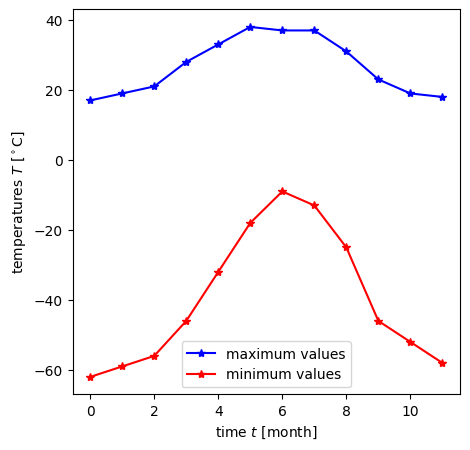

In [5]:
# 2.1
# firstly, I define the data (in Celcius degrees)
max_val=np.array([ 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_val=np.array([ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
# and initialize the corresponding x values
x=np.arange(max_val.size)
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(x,max_val,'*-b',label='maximum values')
ax1.plot(x,min_val,'*-r',label='minimum values')
ax1.set_xlabel('time $t$ [month]')
ax1.set_ylabel('temperatures $T$ [$^\circ$C]')
ax1.legend()
plt.show()

In [6]:
# 2.2
# a gaussian function could describe both the minimum and the maximum temperatures:
# therefore, I initialize the function fun_g as the most general form of the gaussian
def fun_g(x,ampl,mean,sigma,offset):
    return ampl*np.exp(-1*(x-mean)**2/(2*sigma**2))+offset

In [7]:
# 2.3 : I execute 2 fits based on the fun_g I just defined, to ultimately get the optimal parameters 
from scipy import optimize
max_par, max_cov = optimize.curve_fit(fun_g, x, max_val, p0=(20,6,2,20))
min_par, min_cov = optimize.curve_fit(fun_g, x, min_val, p0=(60,6,2,-65))

0 11


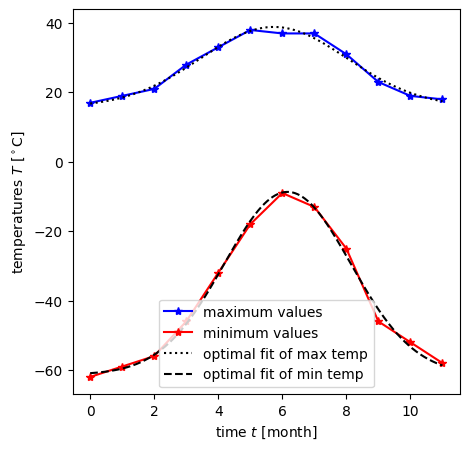

In [8]:
# 2.4 : 
# firstly, I initialize a more dense range of values to better display the traits of the optimal fits
print(x.min(),x.max())
x_fit=np.linspace(start=x.min(),stop=x.max(),num=10**3)
# and then proceed to add the optimal fits to the previous plot
ax1.plot(x_fit,fun_g(x_fit,max_par[0],max_par[1],max_par[2],max_par[3]),':k',
        label='optimal fit of max temp')
ax1.plot(x_fit,fun_g(x_fit,min_par[0],min_par[1],min_par[2],min_par[3]),'--k',
        label='optimal fit of min temp')
ax1.legend()
fig1

In [9]:
# thanks to a good graphical choice of initial parameters, the fits with optimized parameters closely resembles the
# data for both the minimum and the maximum values

In [10]:
# 2.5 : firstly, I visually compare the optimal values I just found
print(max_par[1],min_par[1])
# they're not exhactly the same, so I statistically test their compatibility, for which I need to compute the 
# the accuracy of the fit parameters (as the square root of the diagonal terms of the covariance matrix of the
# optimal parameters)
def confidence_interval(par,cov,idx=1,num=3):
    sigma=np.sqrt(np.diag(cov))[idx]
    return [par[idx]-num*sigma,par[idx]+num*sigma]
# I base my analysis on the comparisons of the two 3 sigma confidence intervals (with a confidence level of over 99%)
# for the mean (time offset) parameters
offset_max_range=confidence_interval(max_par,max_cov)
offset_min_range=confidence_interval(min_par,min_cov)
print(offset_max_range,offset_min_range)

5.735815722427165 6.164525927597905
[5.497412202917, 5.9742192419373294] [6.022904908792189, 6.306146946403622]


In [11]:
# with a confidence level of over 99%, the time offsets for the maximum and the minimum temperatures cannot be
# considered the same

3\. **2D minimization of a six-hump camelback function**

$$ f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2 $$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [12]:
# firstly, I initialize the function
def fun_f(z):
    x,y=z
    return ( (4 - 2.1*(x**2) + (x**4)/3)*x**2 + x*y + (4*(y**2)-4)*y**2 )

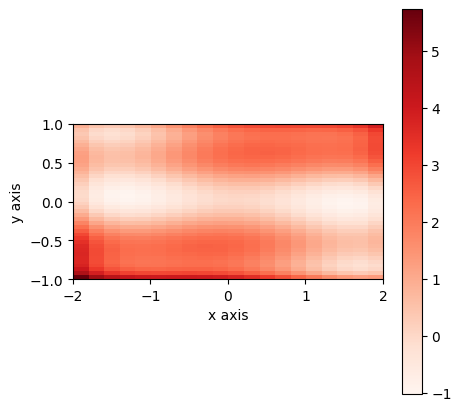

In [13]:
import matplotlib.pyplot as plt
import pylab
# and represent it to have an idea of its behaviour
x = np.arange(start=-2,stop=2,step=0.1)
y = np.arange(start=-1,stop=1,step=0.1)
x_grid, y_grid = np.meshgrid(x, y)
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(1, 1,1)
temp = ax2.imshow(fun_f(((x_grid,y_grid))).T,cmap=plt.cm.Reds,origin='lower',extent=[-2,2,-1,1])
fig2.colorbar(temp)
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
plt.show()

In [14]:
min_f = optimize.minimize(fun_f, x0=(0,0), bounds = [(-2,2),(-1,1)])
print(min_f)

      fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


In [15]:
# after some calculation, we're able to see that the midpoint (0,0) of the restricted region of search ((-2,2),(-1,1))
# is a critical point itself. As a direct consequence, the algorithmic search for a minima will stop there if started
# in x0=(0,0). A different starting point x0 must be used.
# Based on the representation, there seem to be another 2 minima (other than (0,0)) in the second and fourth quadrant
# of the alredy restricted region. Therefore, some good starting point might be:
# for the second quadrant, x0=(-0.75,1.5)
# for the fourth quadrant, x0=(1.5,-0.75)

In [16]:
# to find the minimum in the second quadrant
min_f_1 = optimize.minimize(fun_f, x0=(-1.5,0.75), bounds = [(-2,0),(0,1)])
print(min_f_1)

      fun: -0.21546382438356237
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.21565043e-07, -2.35367280e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-1.70360667,  0.79608346])


In [17]:
# to find the minimum in the fourth quadrant
min_f_2 = optimize.minimize(fun_f, x0=(1.5,-0.75), bounds = [(0,2),(-1,0)])
print(min_f_2)

      fun: -0.21546382438359601
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.66453528e-07,  2.32036611e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.70360668, -0.79608347])


In [18]:
# the two minima seem to be symmetric with respect to the origin of the cartesian plane

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [19]:
# firstly, I import the data using 
import numpy as np
data = np.loadtxt('populations.txt')

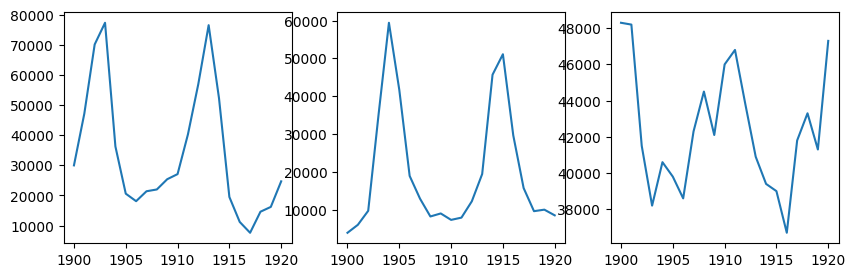

In [26]:
# and visualize it
import matplotlib.pyplot as plt
fig3, ax3 = plt.subplots( nrows=1, ncols=3, figsize=(10,3) )
for idx in range(3):
    ax3[idx].plot(data[:,0],data[:,idx+1])

In [44]:
# I expect that, for all three colums of data, the period corresponding to the main frequency will be around 20 years

per la colonna  1 la frequenza principale è 0.047619047619047616
the corresponding period is  21.0
per la colonna  2 la frequenza principale è 0.047619047619047616
the corresponding period is  21.0
per la colonna  3 la frequenza principale è 0.047619047619047616
the corresponding period is  21.0


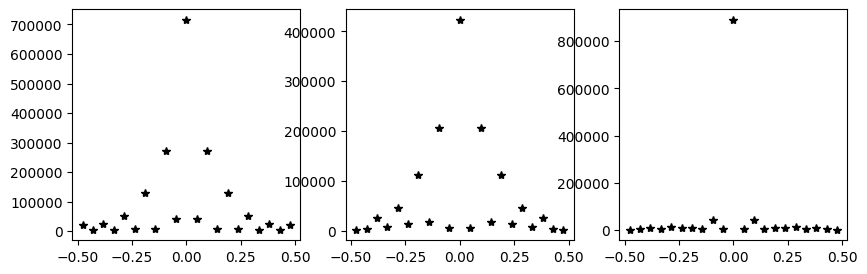

In [53]:
# I then initialize the sample spacing
ss=1 # year
# and  and the vector in which I'm going to store the estimated frequency
freq=np.zeros(3)
from scipy import fftpack
fig4, ax4 = plt.subplots( nrows=1, ncols=3, figsize=(10,3) )
for idx in range(3):
    data_fft = fftpack.fft(data[:,idx+1])
    power = np.abs(data_fft)
    sample_freq = fftpack.fftfreq(data[:,idx+1].size, d=ss)
    ax4[idx].plot(sample_freq, power,'*k')
# I finally get the non-null frequency corresponding to the maximums amplitude
    freq[idx]=sample_freq[power[sample_freq >0 ].argmax()]
    print('per la colonna ',idx+1,'la frequenza principale è',freq[idx])
    print('the corresponding period is ',1/freq[idx])

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().

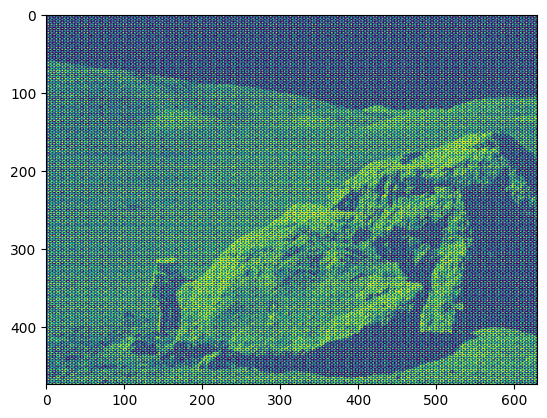

In [75]:
import matplotlib.pyplot as plt
image=plt.imread('moonlanding.png')
plt.imshow(image)
plt.show()

* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?

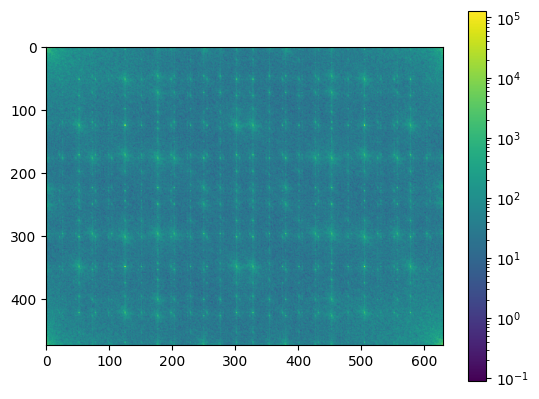

In [76]:
import scipy.fftpack as fftpack
spectrum=fftpack.fft2(image)
#freq=fftpack.fftfreq(image.size)
temp=plt.imshow(np.abs(spectrum),norm='log')
plt.colorbar(temp)
plt.show()

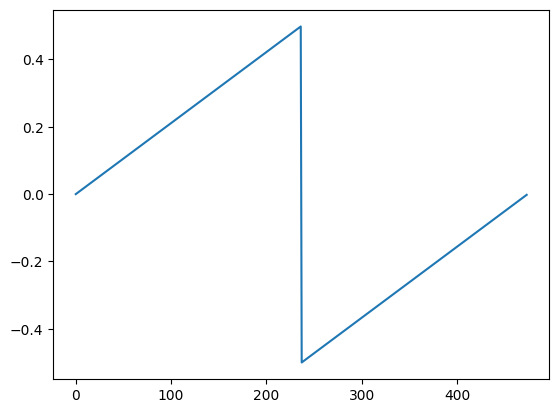

In [81]:
row_freq = np.fft.fftfreq(image.shape[0])
col_freq = np.fft.fftfreq(image.shape[1])
plt.plot(row_freq)

* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).

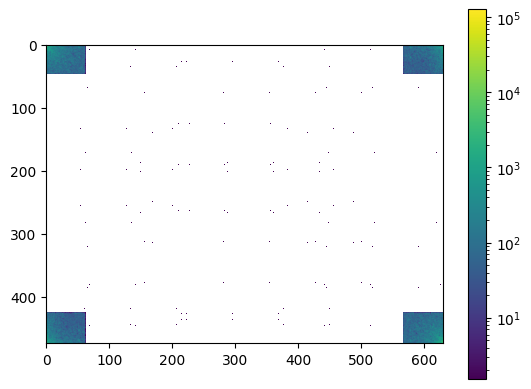

In [106]:
# I make a deep copy of the spectrum before making any change
fixed_spectrum= spectrum.copy()
# and select the fraction of data that we want to get rid of, starting from high frequencies
frac=4/5
r,c=fixed_spectrum.shape
fixed_spectrum[int(r/2*(1-frac)):int(r/2*(1+frac)),:]=0
fixed_spectrum[:,int(c/2*(1-frac)):int(c/2*(1+frac))]=0
temp=plt.imshow(np.abs(fixed_spectrum),norm='log')
plt.colorbar(temp)
plt.show()

* Apply the inverse Fourier transform to see the resulting image.

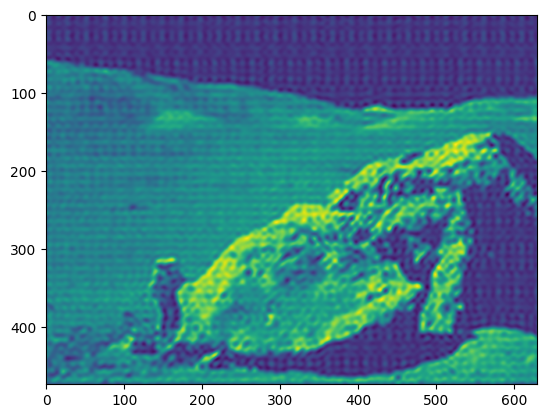

In [107]:
fixed_image=fftpack.ifft2(fixed_spectrum).real
plt.imshow(fixed_image)
plt.show()